Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [1]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [2]:
# imports
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install collections
!{sys.executable} -m pip install xgboost

from collections import namedtuple

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
twitch_df = pd.read_csv("twitch_clean_data.csv", parse_dates=["Date"])
twitch_df.head()

,Date,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,...,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,2.98,114,6,0,0,1,0.0,11,5,...,0,1,0,0.0,0.0,0.0,1,0.033333,12.666666666666666,66.66666666666666
1,2017-06-14,3.47,260,9,0,0,2,0.0,35,8,...,0,0,1,0.0,0.0,0.0,2,0.066667,10.0,34.61538461538461
2,2017-06-15,4.45,40,3,0,0,2,0.0,1,8,...,0,0,0,0.0,0.0,0.0,3,0.100000,40.0,300.0
3,2017-06-16,3.73,38,5,0,0,2,0.0,17,6,...,0,0,0,0.0,0.0,0.0,4,0.133333,2.923076923076923,38.46153846153847
4,2017-06-17,3.99,100,8,0,0,0,0.0,16,7,...,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333333333334,66.66666666666666


In [4]:
twitch_df.columns


Index(['Date', 'Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Extensions Revenue', 'Bounties Revenue', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs', 'Tier 3 subs',
       'Total Gifted Subs', 'Gifted Tier 1 subs', 'Gifted Tier 2 subs',
       'Gifted Tier 3 subs', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'Total_Sub_Revenue', 'donations', 'Total_Earnings', 'streak',
       'activity', 'avg_message_per_viewer', 'user_chatting_percent'],
      dtype='object')

In [5]:
twitch_df.isnull().sum()

Date                           0
Average Viewers                0
Chat Messages                  0
Chatters                       0
Clip Views                     0
Clips Created                  0
Follows                        0
Hosts and Raids Viewers (%)    0
Live Views                     0
Max Viewers                    0
Minutes Watched                0
Minutes Streamed               0
Unique Viewers                 0
Sub Revenue                    0
Prime Revenue                  0
Gifted Subs Revenue            0
Bits Revenue                   0
Ad Revenue                     0
Extensions Revenue             0
Bounties Revenue               0
Prime Subs                     0
Total Paid Subs                0
Tier 1 subs                    0
Tier 2 subs                    0
Tier 3 subs                    0
Total Gifted Subs              0
Gifted Tier 1 subs             0
Gifted Tier 2 subs             0
Gifted Tier 3 subs             0
day_of_week_1                  0
day_of_wee

In [6]:
twitch_df.avg_message_per_viewer.value_counts()

inf                   195
Unknown               103
0.0                    16
5.222222222222222       2
6.333333333333333       2
                     ... 
8.29126213592233        1
14.310344827586206      1
2.090909090909091       1
15.092436974789916      1
11.519480519480519      1
Name: avg_message_per_viewer, Length: 837, dtype: int64

In [7]:
twitch_df.user_chatting_percent.value_counts()

inf                   195
Unknown               103
0.0                    16
33.33333333333333      13
100.0                   7
                     ... 
26.126126126126124      1
51.35135135135135       1
33.13253012048193       1
34.177215189873415      1
19.230769230769234      1
Name: user_chatting_percent, Length: 703, dtype: int64

In [8]:
replace_list = ["inf", "Unknown"]

In [9]:
twitch_original = twitch_df.copy()

In [10]:
twitch_df= twitch_df.replace(to_replace=replace_list, value=0)

In [11]:
twitch_df.user_chatting_percent.value_counts()

0                     298
0.0                    16
33.33333333333333      13
66.66666666666666       7
100.0                   7
                     ... 
26.126126126126124      1
51.35135135135135       1
33.13253012048193       1
34.177215189873415      1
31.901840490797547      1
Name: user_chatting_percent, Length: 702, dtype: int64

In [12]:
twitch_df["user_chatting_percent"]= twitch_df["user_chatting_percent"].astype(str).astype(float)

In [13]:
twitch_df["avg_message_per_viewer"]= twitch_df["avg_message_per_viewer"].astype(str).astype(float)

In [14]:
twitch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1159 non-null   datetime64[ns]
 1   Average Viewers              1159 non-null   float64       
 2   Chat Messages                1159 non-null   int64         
 3   Chatters                     1159 non-null   int64         
 4   Clip Views                   1159 non-null   int64         
 5   Clips Created                1159 non-null   int64         
 6   Follows                      1159 non-null   int64         
 7   Hosts and Raids Viewers (%)  1159 non-null   float64       
 8   Live Views                   1159 non-null   int64         
 9   Max Viewers                  1159 non-null   int64         
 10  Minutes Watched              1159 non-null   int64         
 11  Minutes Streamed             1159 non-null 

In [15]:
twitch_df = twitch_df.set_index(keys="Date")

In [16]:
twitch_df.head()

,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,...,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-13,2.98,114,6,0,0,1,0.0,11,5,480,...,0,1,0,0.0,0.0,0.0,1,0.033333,12.666667,66.666667
2017-06-14,3.47,260,9,0,0,2,0.0,35,8,653,...,0,0,1,0.0,0.0,0.0,2,0.066667,10.000000,34.615385
2017-06-15,4.45,40,3,0,0,2,0.0,1,8,89,...,0,0,0,0.0,0.0,0.0,3,0.100000,40.000000,300.000000
2017-06-16,3.73,38,5,0,0,2,0.0,17,6,421,...,0,0,0,0.0,0.0,0.0,4,0.133333,2.923077,38.461538
2017-06-17,3.99,100,8,0,0,0,0.0,16,7,591,...,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333,66.666667


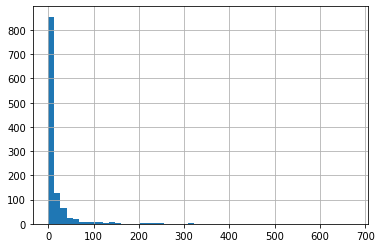

In [17]:
twitch_df['Total_Earnings'].hist(bins=50);

In [18]:
# lets get an average sales price
guess_price = twitch_df['Total_Earnings'].mean()
guess_price

19.597481449525453

In [19]:
# make function that will do it for us
def get_naive_baseline(target_feature):
  guess = target_feature.mean()
  errors = guess - target_feature
  mean_absolute_error = errors.abs().mean()

  naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE"])

  return naive_baseline(guess, errors, mean_absolute_error)

In [20]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [21]:
y_target = twitch_df['Total_Earnings']

In [22]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.


In [23]:
twitch_df["avg_message_per_viewer"].isnull().sum()

0

In [24]:
print(nbaseline.guess)
print(nbaseline.MAE)
print(nbaseline.errors.shape)

19.597481449525453
24.54002158371927
(1159,)


In [25]:
# # make function that will do it for us
# def get_naive_baseline(target_feature):
#   guess = target_feature.mean()
#   errors = guess - target_feature
#   mean_absolute_error = errors.abs().mean()

# #   y_pred = [target_feature.mean()] * len(target_feature.iloc[:,0])
#   r2 = r2_score(target_feature, y_pred)

#   naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE", "R2"])

#   return naive_baseline(guess, errors, mean_absolute_error, r2)

In [26]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [27]:
nbaseline

baseline_info(guess=19.597481449525453, errors=Date
2017-06-13    19.597481
2017-06-14    19.597481
2017-06-15    19.597481
2017-06-16    19.597481
2017-06-17    19.597481
                ...    
2020-08-10    17.142481
2020-08-11    19.597481
2020-08-12    17.196981
2020-08-13    13.936981
2020-08-14    16.137481
Name: Total_Earnings, Length: 1159, dtype: float64, MAE=24.54002158371927)

In [28]:
twitch_df['Total_Earnings'].mean()

19.597481449525453

In [29]:
a= twitch_df['Total_Earnings'] *twitch_df['Total_Earnings'].mean()
a

Date
2017-06-13      0.000000
2017-06-14      0.000000
2017-06-15      0.000000
2017-06-16      0.000000
2017-06-17      0.000000
                 ...    
2020-08-10     48.111817
2020-08-11      0.000000
2020-08-12     47.043754
2020-08-13    110.931544
2020-08-14     67.807286
Name: Total_Earnings, Length: 1159, dtype: float64

In [30]:
y_pred = [twitch_df["Total_Earnings"].mean()] * len(twitch_df["Total_Earnings"])
y_pred

[19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
mean_squared_error(y_target, y_pred)

2960.2625199312783

In [33]:
twitch_df.columns

Index(['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Extensions Revenue', 'Bounties Revenue', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs', 'Tier 3 subs',
       'Total Gifted Subs', 'Gifted Tier 1 subs', 'Gifted Tier 2 subs',
       'Gifted Tier 3 subs', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'Total_Sub_Revenue', 'donations', 'Total_Earnings', 'streak',
       'activity', 'avg_message_per_viewer', 'user_chatting_percent'],
      dtype='object')

# short list a Feature Matrix
short_list = ['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent','Total_Earnings']

In [98]:
short_list = ['Average Viewers', 'Chat Messages', 'Chatters',
              'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent']

In [99]:
feature_matrix_df = twitch_df[short_list]

In [100]:
# Make a function to create Matrix and Target pre validation split
def create_Xmatrix_ytarget(training_df):
  y_target = training_df["Total_Earnings"]
  X_matrix = training_df.drop("Total_Earnings", axis=1)
  return (X_matrix, y_target)

In [101]:
X_matrix, y_target = create_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 20)
(1159,)


# Train Val Test split

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [104]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 20)
(927,)
(232, 20)
(232,)


In [105]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 20)
(741,)
(186, 20)
(186,)
(232, 20)
(232,)


# Let's make a pipeline!  (finally...!)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [108]:
lr_model = make_pipeline(
    LinearRegression()
)

In [109]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [110]:
training_MAE = mean_absolute_error(y_train, lr_model.predict(X_train))

In [111]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [112]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 24.641317610808077
Validation MAE: 24.260934677942167


In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf_bag_model = make_pipeline(
    RandomForestRegressor(random_state=42)
)

In [115]:
rf_bag_model.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [116]:
training_MAE = mean_absolute_error(y_train, rf_bag_model.predict(X_train))

In [117]:
validation_MAE = mean_absolute_error(y_val, rf_bag_model.predict(X_val))

In [118]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 8.851607266387125
Validation MAE: 22.210430955645162


## try the GradientBoostingRegressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
rf_boost_model = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [121]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model.predict(X_train))

In [122]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model.predict(X_val))

In [123]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 9.97344388769161
Validation MAE: 20.798083149838465


 ### Try XGBoost
 

In [124]:

from xgboost import XGBRegressor

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/kellycho/.local/share/virtualenvs/DS-Unit-2-Applied-Modeling-0wMfy1BX/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/kellycho/.local/share/virtualenvs/DS-Unit-2-Applied-Modeling-0wMfy1BX/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [125]:
xgb_model = make_pipeline(
    xgboost.XGBRegressor()
)

NameError: name 'xgboost' is not defined

## Feature Importances

In [126]:
# rf_bag_model = make_pipeline(
#     RandomForestRegressor(random_state=42)
# )

In [127]:
# rf_bag_model.fit(X_train, y_train)

In [128]:
fi= rf_bag_model.named_steps["randomforestregressor"].feature_importances_

In [129]:
importances = pd.Series(fi, X_train.columns).sort_values(ascending=False)
importances

Chatters                       0.284613
Average Viewers                0.134604
Chat Messages                  0.066197
avg_message_per_viewer         0.061269
Max Viewers                    0.058684
activity                       0.056622
user_chatting_percent          0.050723
Live Views                     0.048748
Hosts and Raids Viewers (%)    0.044077
Minutes Streamed               0.040282
Follows                        0.039403
streak                         0.038362
Unique Viewers                 0.035631
day_of_week_1                  0.012481
day_of_week_6                  0.009447
day_of_week_3                  0.007905
day_of_week_2                  0.005927
day_of_week_5                  0.001794
day_of_week_7                  0.001760
day_of_week_4                  0.001468
dtype: float64

<AxesSubplot:>

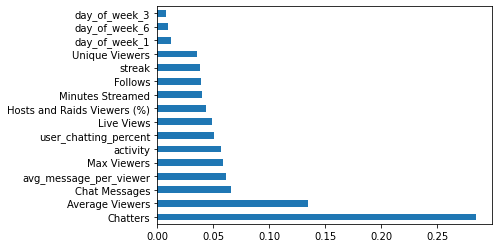

In [130]:
importances.head(16).plot(kind="barh")

## Drop Column

### Permutation IMportance
train model on full dataset
Choose a column an shuffle rows
See how the validation metrics change

In [131]:
X_val["activity"].head(10)

Date
2019-05-15    0.500000
2018-12-09    0.633333
2018-07-31    1.000000
2017-07-30    0.966667
2020-06-20    0.533333
2019-07-29    0.566667
2018-10-09    1.000000
2019-08-12    0.533333
2019-01-23    0.766667
2017-11-08    1.000000
Name: activity, dtype: float64

In [132]:
X_val_permuted = X_val.copy()

In [133]:
np.random.permutation(X_val["activity"])[:10]

array([0.5       , 0.56666667, 0.56666667, 0.43333333, 0.83333333,
       0.53333333, 0.96666667, 0.96666667, 0.33333333, 0.96666667])

In [134]:
X_val_permuted["activity"] = np.random.permutation(X_val_permuted["activity"])

In [135]:
X_val_permuted["activity"].head(10)

Date
2019-05-15    0.200000
2018-12-09    0.933333
2018-07-31    0.500000
2017-07-30    0.400000
2020-06-20    1.000000
2019-07-29    0.300000
2018-10-09    0.500000
2019-08-12    0.800000
2019-01-23    0.966667
2017-11-08    0.500000
Name: activity, dtype: float64

In [136]:
X_val_permuted["activity"].value_counts()

0.966667    24
1.000000    21
0.500000    20
0.533333    18
0.933333    16
0.466667    14
0.900000    10
0.633333     8
0.800000     8
0.566667     8
0.733333     5
0.833333     4
0.600000     4
0.433333     4
0.300000     4
0.866667     4
0.666667     4
0.766667     4
0.400000     2
0.200000     1
0.266667     1
0.033333     1
0.333333     1
Name: activity, dtype: int64

In [137]:
X_val["activity"].value_counts()

0.966667    24
1.000000    21
0.500000    20
0.533333    18
0.933333    16
0.466667    14
0.900000    10
0.633333     8
0.800000     8
0.566667     8
0.733333     5
0.833333     4
0.300000     4
0.433333     4
0.600000     4
0.866667     4
0.766667     4
0.666667     4
0.400000     2
0.200000     1
0.033333     1
0.266667     1
0.333333     1
Name: activity, dtype: int64

In [138]:
rf_boost_model2 = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model2.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [139]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val))

In [140]:
validation_MAE3 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val_permuted))

In [141]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model2.predict(X_train))

In [142]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")
print(f"Validation MAE Permuted: {validation_MAE3}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 9.97344388769161
Validation MAE: 20.798083149838465
Validation MAE Permuted: 21.283399376194915


### Automate it. 

In [143]:
from sklearn.inspection import permutation_importance

In [144]:
pi = permutation_importance(rf_boost_model2, X_val, y_val)

In [145]:
type(pi)

sklearn.utils.Bunch

In [146]:
pi

{'importances_mean': array([ 0.02909133,  0.04769683,  0.10221114,  0.00340904,  0.00076057,
         0.07406863,  0.11421279,  0.00654614,  0.02586457,  0.        ,
        -0.00136669,  0.01066555,  0.00412041, -0.00017723,  0.        ,
        -0.00088598,  0.00465069, -0.01186413, -0.03094918, -0.02760377]),
 'importances_std': array([0.02028103, 0.02541685, 0.02577063, 0.00764786, 0.00607945,
        0.01606054, 0.02967424, 0.0100771 , 0.00687471, 0.        ,
        0.00085387, 0.00454027, 0.0041479 , 0.00015973, 0.        ,
        0.00022344, 0.0086665 , 0.02591842, 0.02237717, 0.03104348]),
 'importances': array([[ 2.61051946e-02,  3.26358711e-02,  1.24504617e-02,
          6.56709556e-02,  8.59417358e-03],
        [ 5.62742268e-02,  3.82289787e-02,  7.26328802e-02,
          2.84138430e-03,  6.85067024e-02],
        [ 9.71629629e-02,  1.49546776e-01,  1.02670393e-01,
          8.92231329e-02,  7.24524457e-02],
        [-1.21850541e-03,  1.66475193e-02,  7.34694570e-03,
      

In [147]:
pi_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [148]:
pi_df.sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
Max Viewers,0.1142,0.029674
Chatters,0.1022,0.025771
Live Views,0.0741,0.016061
Chat Messages,0.0477,0.025417
Average Viewers,0.0291,0.020281
Unique Viewers,0.0259,0.006875
day_of_week_3,0.0107,0.004540
Minutes Streamed,0.0065,0.010077
streak,0.0047,0.008666
day_of_week_4,0.0041,0.004148
